**Η Εργασία εκπονήθηκε από τους:**

*   Δημήτριος Χρυσός (ΑΜ: 1115202100275)
*   Αναστάσιος Μουμουλίδης (ΑΜ: 1115202100108)

# **Mount Drive**

In [131]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Create the 2019 dataframe (df2019)**

### Import libraries

In [132]:
# Import libraries
import pandas as pd
import sys
import matplotlib.pyplot as plt
import string
import re

wanted_columns = ['id', 'comments']

### Create the data from reviews.csv for every month

In [133]:
####### febrouary - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/febrouary/reviews.csv"
df1 = pd.read_csv(path, encoding='utf-8', engine='python')
df = df1[['id', "comments"]]

####### march - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/march/reviews.csv"
df2 = pd.read_csv(path, encoding='utf-8', engine='python')
df2 = df2[['id', "comments"]]
df = pd.concat([df,df2])

####### april - 2019
path = "/content/gdrive/MyDrive/Tede/project1/data/2019/april/reviews.csv"
df3 = pd.read_csv(path, encoding='utf-8', engine='python')
df3 = df3[['id', "comments"]]
df = pd.concat([df,df3])

df

,id,comments
0,271535,"The apartment was wonderful, fully equiped, be..."
1,1994237,Emmanouil was an excellent host. He provided u...
2,4678609,"Manos is a very good host, he is kind and help..."
3,12502994,"Our stay in Emmanouil home was comfortable, qu..."
4,19482948,Fantastic accommodation very well located to v...
...,...,...
287428,434935542,The host canceled this reservation 16 days bef...
287429,434643359,"The flat was very clean and new, all sanitary ..."
287430,433965320,Καλαίσθητος χώρος! Εξαιρετική τοποθεσία πολύ κ...
287431,435380704,"Very nice renovated place, nice decoration. Gr..."


### Drop rows with nan values

In [134]:
df.dropna(inplace=True)
df

,id,comments
0,271535,"The apartment was wonderful, fully equiped, be..."
1,1994237,Emmanouil was an excellent host. He provided u...
2,4678609,"Manos is a very good host, he is kind and help..."
3,12502994,"Our stay in Emmanouil home was comfortable, qu..."
4,19482948,Fantastic accommodation very well located to v...
...,...,...
287428,434935542,The host canceled this reservation 16 days bef...
287429,434643359,"The flat was very clean and new, all sanitary ..."
287430,433965320,Καλαίσθητος χώρος! Εξαιρετική τοποθεσία πολύ κ...
287431,435380704,"Very nice renovated place, nice decoration. Gr..."


### Remove punctuation, make lowercarse and remove symbols

In [135]:
# remove punctuation
df['comments'] = df['comments'].str.replace(f"[{string.punctuation}]", '', regex=True)

# make lowercase
df['comments'] = df['comments'].str.lower()

# remove symbols
df['comments'] = df['comments'].str.replace(r'[!@#$%^&*()-_=+~`]', '', regex=True)
df

,id,comments
0,271535,the apartment was wonderful fully equiped beau...
1,1994237,emmanouil was an excellent host he provided us...
2,4678609,manos is a very good host he is kind and helpf...
3,12502994,our stay in emmanouil home was comfortable qui...
4,19482948,fantastic accommodation very well located to v...
...,...,...
287428,434935542,the host canceled this reservation days befor...
287429,434643359,the flat was very clean and new all sanitary a...
287430,433965320,καλαίσθητος χώρος εξαιρετική τοποθεσία πολύ κο...
287431,435380704,very nice renovated place nice decoration grea...


### Remove emojis and emoticons

In [136]:
# remove emojis and emoticons

# remove emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

df['comments'] = df['comments'].apply(lambda text: emoji_pattern.sub(r'', text))

# remove emoticons
emoticon_pattern = r'(?:;|:|=)(?:-|=)?(?:\)|D|\(|\\|\/|P)' # emoticons regular expression

df['comments'] = df['comments'].apply(lambda text: re.sub(emoticon_pattern, '', text))
df

,id,comments
0,271535,the apartment was wonderful fully equiped beau...
1,1994237,emmanouil was an excellent host he provided us...
2,4678609,manos is a very good host he is kind and helpf...
3,12502994,our stay in emmanouil home was comfortable qui...
4,19482948,fantastic accommodation very well located to v...
...,...,...
287428,434935542,the host canceled this reservation days befor...
287429,434643359,the flat was very clean and new all sanitary a...
287430,433965320,καλαίσθητος χώρος εξαιρετική τοποθεσία πολύ κο...
287431,435380704,very nice renovated place nice decoration grea...


### Remove links and stopwords

In [137]:
# remove links
df['comments'] = df['comments'].str.replace(r'http\S+', '', regex=True)
df

,id,comments
0,271535,the apartment was wonderful fully equiped beau...
1,1994237,emmanouil was an excellent host he provided us...
2,4678609,manos is a very good host he is kind and helpf...
3,12502994,our stay in emmanouil home was comfortable qui...
4,19482948,fantastic accommodation very well located to v...
...,...,...
287428,434935542,the host canceled this reservation days befor...
287429,434643359,the flat was very clean and new all sanitary a...
287430,433965320,καλαίσθητος χώρος εξαιρετική τοποθεσία πολύ κο...
287431,435380704,very nice renovated place nice decoration grea...


In [138]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
stop_words = set(stopwords.words('english'))
df['comments'] = df['comments'].apply(lambda text: ' '.join([word for word in text.split() if word not in (stop_words)]))
df

,id,comments
0,271535,apartment wonderful fully equiped beautiful de...
1,1994237,emmanouil excellent host provided us everythin...
2,4678609,manos good host kind helpful apartments spacio...
3,12502994,stay emmanouil home comfortable quite perfect ...
4,19482948,fantastic accommodation well located visit ath...
...,...,...
287428,434935542,host canceled reservation days arrival automat...
287429,434643359,flat clean new sanitary furniture perfect cond...
287430,433965320,καλαίσθητος χώρος εξαιρετική τοποθεσία πολύ κο...
287431,435380704,nice renovated place nice decoration great loc...


### Keep only comments in english

In [140]:
df2019 = df[df['comments'].str.contains(r'^[0-9A-Za-z\s]+$', na=False)]
df2019

,id,comments
0,271535,apartment wonderful fully equiped beautiful de...
1,1994237,emmanouil excellent host provided us everythin...
2,4678609,manos good host kind helpful apartments spacio...
3,12502994,stay emmanouil home comfortable quite perfect ...
4,19482948,fantastic accommodation well located visit ath...
...,...,...
287424,434639664,great place spacious cleanexcellent hosts frie...
287428,434935542,host canceled reservation days arrival automat...
287429,434643359,flat clean new sanitary furniture perfect cond...
287431,435380704,nice renovated place nice decoration great loc...


# **Create the 2023 dataframe (df2023)**

### Import libraries

In [141]:
# Import libraries
import pandas as pd
import sys
import matplotlib.pyplot as plt
import string
import re


wanted_columns = ['id', 'comments']

### Create the data from reviews.csv for every month

In [142]:
####### march - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/march/reviews.csv"
df1 = pd.read_csv(path, encoding='utf-8', engine='python')
df = df1[['id', "comments"]]

####### june - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/june/reviews.csv"
df2 = pd.read_csv(path, encoding='utf-8', engine='python')
df2 = df2[['id', "comments"]]
df = pd.concat([df,df2])

####### september - 2023
path = "/content/gdrive/MyDrive/Tede/project1/data/2023/september/reviews.csv"
df3 = pd.read_csv(path, encoding='utf-8', engine='python')
df3 = df3[['id', "comments"]]
df = pd.concat([df,df3])

df

,id,comments
0,271535,"The apartment was wonderful, fully equiped, be..."
1,1994237,Emmanouil was an excellent host. He provided u...
2,4678609,"Manos is a very good host, he is kind and help..."
3,8741811,"Everything was just PERFECT. Great location, b..."
4,9063055,I had such a nice time in Angeliki little appa...
...,...,...
579986,919337814709267516,Very good
579987,914329802652702980,Die Unterkunft ist gepflegt und sauber. Der Bl...
579988,920767347593508939,Great place for our last night in Athens.<br/>...
579989,920806964027780226,Lovely place in Athens! The flat is just renov...


### Drop rows with nan values

In [143]:
df.dropna(inplace=True)
df

,id,comments
0,271535,"The apartment was wonderful, fully equiped, be..."
1,1994237,Emmanouil was an excellent host. He provided u...
2,4678609,"Manos is a very good host, he is kind and help..."
3,8741811,"Everything was just PERFECT. Great location, b..."
4,9063055,I had such a nice time in Angeliki little appa...
...,...,...
579986,919337814709267516,Very good
579987,914329802652702980,Die Unterkunft ist gepflegt und sauber. Der Bl...
579988,920767347593508939,Great place for our last night in Athens.<br/>...
579989,920806964027780226,Lovely place in Athens! The flat is just renov...


### Remove punctuation, make lowercarse and remove symbols

In [144]:
# remove punctuation
df['comments'] = df['comments'].str.replace(f"[{string.punctuation}]", '', regex=True)

# make lowercase
df['comments'] = df['comments'].str.lower()

# remove symbols
df['comments'] = df['comments'].str.replace(r'[!@#$%^&*()-_=+~`]', '', regex=True)
df

,id,comments
0,271535,the apartment was wonderful fully equiped beau...
1,1994237,emmanouil was an excellent host he provided us...
2,4678609,manos is a very good host he is kind and helpf...
3,8741811,everything was just perfect great location bea...
4,9063055,i had such a nice time in angeliki little appa...
...,...,...
579986,919337814709267516,very good
579987,914329802652702980,die unterkunft ist gepflegt und sauber der bli...
579988,920767347593508939,great place for our last night in athensbrvery...
579989,920806964027780226,lovely place in athens the flat is just renova...


### Remove emojis and emoticons

In [145]:
# remove emojis and emoticons

# remove emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

df['comments'] = df['comments'].apply(lambda text: emoji_pattern.sub(r'', text))

# remove emoticons
emoticon_pattern = r'(?:;|:|=)(?:-|=)?(?:\)|D|\(|\\|\/|P)' # emoticons regular expression

df['comments'] = df['comments'].apply(lambda text: re.sub(emoticon_pattern, '', text))
df

,id,comments
0,271535,the apartment was wonderful fully equiped beau...
1,1994237,emmanouil was an excellent host he provided us...
2,4678609,manos is a very good host he is kind and helpf...
3,8741811,everything was just perfect great location bea...
4,9063055,i had such a nice time in angeliki little appa...
...,...,...
579986,919337814709267516,very good
579987,914329802652702980,die unterkunft ist gepflegt und sauber der bli...
579988,920767347593508939,great place for our last night in athensbrvery...
579989,920806964027780226,lovely place in athens the flat is just renova...


### Remove links and stopwords

In [146]:
# remove links
df['comments'] = df['comments'].str.replace(r'http\S+', '', regex=True)
df

,id,comments
0,271535,the apartment was wonderful fully equiped beau...
1,1994237,emmanouil was an excellent host he provided us...
2,4678609,manos is a very good host he is kind and helpf...
3,8741811,everything was just perfect great location bea...
4,9063055,i had such a nice time in angeliki little appa...
...,...,...
579986,919337814709267516,very good
579987,914329802652702980,die unterkunft ist gepflegt und sauber der bli...
579988,920767347593508939,great place for our last night in athensbrvery...
579989,920806964027780226,lovely place in athens the flat is just renova...


In [147]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
stop_words = set(stopwords.words('english'))
df['comments'] = df['comments'].apply(lambda text: ' '.join([word for word in text.split() if word not in (stop_words)]))
df

,id,comments
0,271535,apartment wonderful fully equiped beautiful de...
1,1994237,emmanouil excellent host provided us everythin...
2,4678609,manos good host kind helpful apartments spacio...
3,8741811,everything perfect great location beautiful pl...
4,9063055,nice time angeliki little appartement brthe pl...
...,...,...
579986,919337814709267516,good
579987,914329802652702980,die unterkunft ist gepflegt und sauber der bli...
579988,920767347593508939,great place last night athensbrvery close rest...
579989,920806964027780226,lovely place athens flat renovated everything ...


### Keep only comments in english

In [149]:
df2023 = df[df['comments'].str.contains(r'^[0-9A-Za-z\s]+$', na=False)]
df2023

,id,comments
0,271535,apartment wonderful fully equiped beautiful de...
1,1994237,emmanouil excellent host provided us everythin...
2,4678609,manos good host kind helpful apartments spacio...
4,9063055,nice time angeliki little appartement brthe pl...
5,9187296,angelikis place worked great trip athens angel...
...,...,...
579984,909960662517965426,great location clean host accommodating helpful
579985,912174977833982184,great location safe locked doors downstairs en...
579986,919337814709267516,good
579988,920767347593508939,great place last night athensbrvery close rest...


# **Ερώτημα 1**

## **2019**

### **Filtering**

In [150]:
# negative words list
negative_words = ['dirty', 'uncomfortable', 'noisy', 'unsafe', 'poor', 'bad', 'unfriendly', 'rude', 'unhygienic', 'smelly', 'run-down', 'overpriced', 'crowded', 'disgusting', 'unresponsive', 'faulty', 'broken', 'unclean', 'subpar', 'awful', 'filthy', 'dilapidated', 'terrible', 'horrible', 'grimy', 'shabby', 'inferior', 'disappointing', 'damaged', 'insufficient', 'cramped', 'unacceptable', 'unsatisfactory', 'unbearable', 'defective', 'obnoxious', 'stained', 'poorly maintained', 'frustrating', 'disturbing', 'infested', 'neglected', 'bizarre', 'hazardous', 'unfit', 'pathetic', 'unsanitary', 'crummy', 'depressing', 'lousy', 'monotonous', 'gloomy', 'rotten', 'creaky', 'rickety', 'outdated', 'negligent', 'unsightly', 'musty', 'rusty', 'untrustworthy', 'shoddy', 'unkempt', 'misinformed', 'uninviting', 'inhospitable', 'uncooperative', 'unwilling', 'blatant', 'dingy', 'disheveled', 'grubby', 'mucky', 'squalid', 'clogged', 'pungent', 'gross', 'dreary', 'inadequate', 'lacking', 'underwhelming', 'oppressive', 'suffocating', 'distasteful', 'inappropriate']

# positive words list
positive_words = ['amazing', 'awesome', 'beautiful', 'clean', 'comfortable', 'cozy', 'fantastic', 'friendly', 'great', 'impressive', 'incredible', 'lovely', 'neat', 'nice', 'pleasant', 'polite', 'pristine', 'relaxing', 'spacious', 'spotless', 'stunning', 'wonderful', 'charming', 'delightful', 'exceptional', 'excellent', 'fabulous', 'gorgeous', 'immaculate', 'outstanding', 'perfect', 'remarkable', 'sparkling', 'tidy', 'welcoming', 'accommodating', 'affordable', 'appealing', 'attractive', 'brilliant', 'cheerful', 'classy', 'convenient', 'courteous', 'enjoyable', 'extraordinary', 'favorable', 'flawless', 'gem', 'hospitable', 'impeccable', 'inspirational', 'luxurious', 'magnificent', 'marvelous', 'memorable', 'modern', 'peaceful', 'picturesque', 'pleasant', 'pleasing', 'positive', 'preferred', 'prime', 'pristine', 'quality', 'quiet', 'radiant', 'reliable', 'satisfying', 'serene', 'stylish', 'superb', 'terrific', 'top-notch', 'trustworthy', 'unforgettable', 'unique', 'upbeat', 'warm', 'welcoming', 'wholesome', 'worthy', 'wonderful', 'wondrous', 'breathtaking', 'cheery', 'deluxe', 'enchanting', 'enjoyable', 'graceful', 'impressive', 'innovative', 'lively', 'majestic', 'neat', 'outstanding', 'picturesque', 'rejuvenating']

In [151]:
# create the negative words dataframe

# getting all the rows, that include at least two negative words from the negative words list
# and have less than 128 words
neg_list_of_rows = []
for index, row in df2019.iterrows():
  occurrences = 0
  for word in negative_words:
    if word in row['comments']:
      occurrences += 1
  words_list = row['comments'].split()
  if occurrences >= 2 and len(words_list) < 128:
    neg_list_of_rows.append(row)

# create the neg_filtered_df
neg_filtered_df = pd.DataFrame(neg_list_of_rows)
neg_filtered_df

,id,comments
547,346863555,location apartment excellent flat building qui...
660,13744312,think place didnt meet expectation perfect pla...
666,19588193,directly booking received nice email alex expl...
809,8252623,mix flight ended showing day later expected tr...
968,155269696,husband stayed nights overall nofrills student...
...,...,...
283453,356147793,realise probably first stay christoss apartmen...
284778,368018198,first ioanna perfect host kind quick respond t...
285202,418056926,unfortunately report fraud instead unique stud...
285224,405388913,ill pros cons list pros ideal location right b...


In [152]:
# create the positive words dataframe from a small sample

# getting all the rows from the small sample, that include at least two positive
# words from the negative words list and have less than 128 words
positive_sample_df = df2019.sample(n=800)
pos_list_of_rows = []
for index, row in positive_sample_df.iterrows():
  occurrences = 0
  for word in positive_words:
    if word in row['comments']:
      occurrences += 1
  words_list = row['comments'].split()
  if occurrences >= 2 and len(words_list) < 128:
    pos_list_of_rows.append(row)

# create the pos_filtered_df
pos_filtered_df = pd.DataFrame(pos_list_of_rows)
pos_filtered_df

,id,comments
198543,406855862,kalliopemargaritas place wonderful apartment e...
16438,353957197,apartment nice decorated clean comfortable nic...
82570,151702911,apartment studio located excellent area athens...
135023,259547589,great experience total christina amazing host ...
135086,143081023,nice host attentive helpful suprising left foo...
...,...,...
16764,155943052,lydia best hostess could asked provided great ...
105958,112709740,lovely nights could fault close city either ni...
85757,139688678,fell love loukas place view absolutely stunnin...
206085,182197425,julies place really nice quite looks like pict...


In [153]:
# create the neutral words dataframe from a small sample

# getting all the rows from the small sample, that don't include positive words
# nor negative words and have less than 128 words
neutral_sample_df = df2019.sample(n=5000)
neu_list_of_rows = []
for index, row in neutral_sample_df.iterrows():
  if not any(word in row['comments'] for word in negative_words):
    if not any(word in row['comments'] for word in positive_words):
      words_list = row['comments'].split()
      if len(words_list) < 128:
        neu_list_of_rows.append(row)

# create the neu_filtered_df
neu_filtered_df = pd.DataFrame(neu_list_of_rows)
neu_filtered_df

,id,comments
25048,21191612,good apartment location close plaka acropolis ...
118957,158021303,stay argiro expected arranged friend let us up...
2506,322119064,good place staying
218509,264553614,departament magnificient first helper attitude...
146606,132467021,looks like photos meters metro station
...,...,...
124417,88907925,hello filipos got home safe realy pleasure mee...
200515,284052263,ever come athens reserve victoria right place ...
162287,237481349,communication constantinos couldnt smoother fl...
102802,248251579,kals communication timely fashion able arrive ...


In [154]:
# Create one dataframe by merging the three previous dataframes
merged_filtered_df = pd.concat([neg_filtered_df, pos_filtered_df])
merged_filtered_df = pd.concat([merged_filtered_df, neu_filtered_df])
merged_filtered_df = merged_filtered_df.reset_index(drop=True)
merged_filtered_df

,id,comments
0,346863555,location apartment excellent flat building qui...
1,13744312,think place didnt meet expectation perfect pla...
2,19588193,directly booking received nice email alex expl...
3,8252623,mix flight ended showing day later expected tr...
4,155269696,husband stayed nights overall nofrills student...
...,...,...
2802,88907925,hello filipos got home safe realy pleasure mee...
2803,284052263,ever come athens reserve victoria right place ...
2804,237481349,communication constantinos couldnt smoother fl...
2805,248251579,kals communication timely fashion able arrive ...


### **Text - Classification**

In [155]:
# get libraries
!pip install transformers
!pip install transformers torch
import transformers
from transformers import pipeline

In [156]:
# make classifier
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
classifier = pipeline("text-classification", model=model_path)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [157]:
# make the text-classification
filtered_df_new = merged_filtered_df.sample(n=500)
mylist = filtered_df_new['comments'].tolist()
results = classifier(mylist)

In [158]:
# get the statistics
count_positive = 0
count_negative = 0
count_neutral = 0
for i in results:
  if i['label'] == "POS" or i['label'] == "positive": count_positive += 1
  if i['label'] == "NEG" or i['label'] == "negative": count_negative += 1
  if i['label'] == "NEU" or i['label'] == "neutral": count_neutral += 1

total = count_positive + count_negative + count_neutral
print("count_pos: {} | count_neg: {} | counte_neu: {}".format(count_positive/total, count_negative/total, count_neutral/total))

count_pos: 0.578 | count_neg: 0.22 | counte_neu: 0.202


In [159]:
sentiment = []
for i in results:
  sentiment.append(i['label'])

filtered_df_new['sentiment'] = sentiment
sentiment_df = filtered_df_new
sentiment_df

,id,comments,sentiment
1359,428863333,andreas kind host apartment nice well equipped...,positive
2615,196856567,navigating without gps destination know landma...,neutral
480,212502511,apartment hosts great apartment easy get mean ...,positive
2044,197850343,see pictures get marilena helpful enough arran...,positive
2030,175172603,really recommend stay sotiris place literally ...,positive
...,...,...,...
470,286863545,great location modern spacious apartment howev...,negative
1376,112116645,apartment fine well located issue hosts behavi...,negative
1514,211748426,eleni extremely nice welcoming communication q...,positive
1751,269209707,great location wonderful street close busy roa...,positive


### **Histogram**

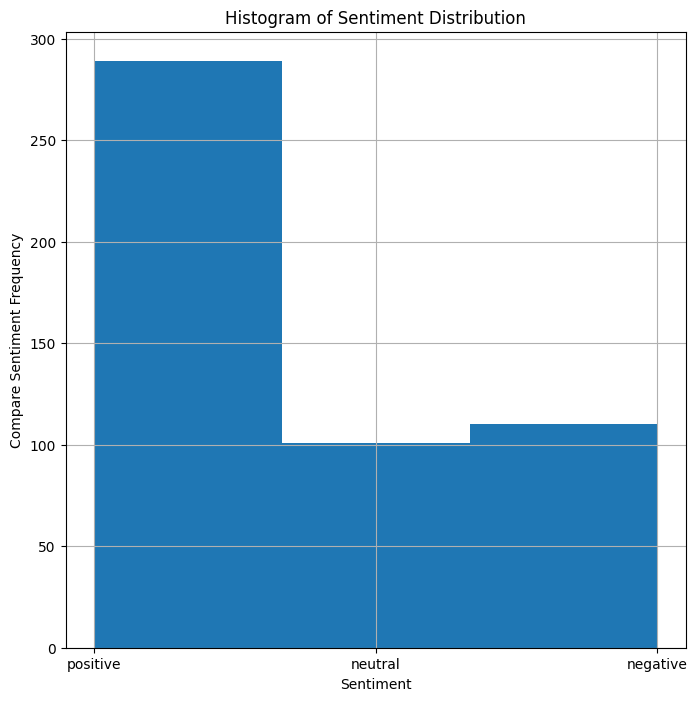

In [160]:
histogram_df = sentiment_df.copy()
plt.figure(figsize=(8, 8))
histogram_df.sentiment.hist(bins=3)
plt.gca()
plt.title('Histogram of Sentiment Distribution')
plt.xlabel('Sentiment', fontsize=10)
plt.ylabel('Compare Sentiment Frequency', fontsize=10)
plt.show()

## **2023**

### **Filtering**

In [161]:
# negative words list
negative_words = ['dirty', 'uncomfortable', 'noisy', 'unsafe', 'poor', 'bad', 'unfriendly', 'rude', 'unhygienic', 'smelly', 'run-down', 'overpriced', 'crowded', 'disgusting', 'unresponsive', 'faulty', 'broken', 'unclean', 'subpar', 'awful', 'filthy', 'dilapidated', 'terrible', 'horrible', 'grimy', 'shabby', 'inferior', 'disappointing', 'damaged', 'insufficient', 'cramped', 'unacceptable', 'unsatisfactory', 'unbearable', 'defective', 'obnoxious', 'stained', 'poorly maintained', 'frustrating', 'disturbing', 'infested', 'neglected', 'bizarre', 'hazardous', 'unfit', 'pathetic', 'unsanitary', 'crummy', 'depressing', 'lousy', 'monotonous', 'gloomy', 'rotten', 'creaky', 'rickety', 'outdated', 'negligent', 'unsightly', 'musty', 'rusty', 'untrustworthy', 'shoddy', 'unkempt', 'misinformed', 'uninviting', 'inhospitable', 'uncooperative', 'unwilling', 'blatant', 'dingy', 'disheveled', 'grubby', 'mucky', 'squalid', 'clogged', 'pungent', 'gross', 'dreary', 'inadequate', 'lacking', 'underwhelming', 'oppressive', 'suffocating', 'distasteful', 'inappropriate']

# positive words list
positive_words = ['amazing', 'awesome', 'beautiful', 'clean', 'comfortable', 'cozy', 'fantastic', 'friendly', 'great', 'impressive', 'incredible', 'lovely', 'neat', 'nice', 'pleasant', 'polite', 'pristine', 'relaxing', 'spacious', 'spotless', 'stunning', 'wonderful', 'charming', 'delightful', 'exceptional', 'excellent', 'fabulous', 'gorgeous', 'immaculate', 'outstanding', 'perfect', 'remarkable', 'sparkling', 'tidy', 'welcoming', 'accommodating', 'affordable', 'appealing', 'attractive', 'brilliant', 'cheerful', 'classy', 'convenient', 'courteous', 'enjoyable', 'extraordinary', 'favorable', 'flawless', 'gem', 'hospitable', 'impeccable', 'inspirational', 'luxurious', 'magnificent', 'marvelous', 'memorable', 'modern', 'peaceful', 'picturesque', 'pleasant', 'pleasing', 'positive', 'preferred', 'prime', 'pristine', 'quality', 'quiet', 'radiant', 'reliable', 'satisfying', 'serene', 'stylish', 'superb', 'terrific', 'top-notch', 'trustworthy', 'unforgettable', 'unique', 'upbeat', 'warm', 'welcoming', 'wholesome', 'worthy', 'wonderful', 'wondrous', 'breathtaking', 'cheery', 'deluxe', 'enchanting', 'enjoyable', 'graceful', 'impressive', 'innovative', 'lively', 'majestic', 'neat', 'outstanding', 'picturesque', 'rejuvenating']

In [162]:
# create the negative words dataframe

# getting all the rows, that include at least two negative words from the negative words list
# and have less than 128 words
neg_list_of_rows = []
for index, row in df2023.iterrows():
  occurrences = 0
  for word in negative_words:
    if word in row['comments']:
      occurrences += 1
  words_list = row['comments'].split()
  if occurrences >= 2 and len(words_list) < 128:
    neg_list_of_rows.append(row)

# create the neg_filtered_df
neg_filtered_df = pd.DataFrame(neg_list_of_rows)
neg_filtered_df

,id,comments
1062,3908737,vassiliss apartment offers great value great l...
1607,487422904,small confy place amazing view th floor northe...
2291,692064573419962913,someone mentioned flat far pictures right coul...
2479,346863555,location apartment excellent flat building qui...
2656,512603798,looks nice fresh pictures reality run dirty sm...
...,...,...
577800,878751844885444492,house old style fourth floor without lift unfo...
577816,885307780994412930,location convenient apartment seemed new updat...
578015,886386734472450538,arrived apartment block distinct smell went st...
579142,902013492614071351,greatly refurbished comfortable apartment rath...


In [163]:
# create the positive words dataframe from a small sample

# getting all the rows from the small sample, that include at least two positive
# words from the negative words list and have less than 128 words
positive_sample_df = df2023.sample(n=800)
pos_list_of_rows = []
for index, row in positive_sample_df.iterrows():
  occurrences = 0
  for word in positive_words:
    if word in row['comments']:
      occurrences += 1
  words_list = row['comments'].split()
  if occurrences >= 2 and len(words_list) < 128:
    pos_list_of_rows.append(row)

# create the pos_filtered_df
pos_filtered_df = pd.DataFrame(pos_list_of_rows)
pos_filtered_df

,id,comments
401315,727360690166634267,stay athens excellent maritina met us arranged...
574186,901246400742022617,thank everything brwonderful clean place brthe...
88458,166350735,amazing location great view acropolis efthimis...
346615,703426443011040618,great time apartment amazing loved amenities a...
480923,546900267995738581,clean comfortable great location close metro
...,...,...
179116,327734788,apartment superb excellent location right main...
414662,677266587347607773,studio lovely amazing view city close many res...
575277,855551275123810964,place beautiful location central host extremel...
277841,754909047326846524,lovely stay loved balcony walls thin slept wel...


In [164]:
# create the neutral words dataframe from a small sample

# getting all the rows from the small sample, that don't include positive words
# nor negative words and have less than 128 words
neutral_sample_df = df2023.sample(n=5000)
neu_list_of_rows = []
for index, row in neutral_sample_df.iterrows():
  if not any(word in row['comments'] for word in negative_words):
    if not any(word in row['comments'] for word in positive_words):
      words_list = row['comments'].split()
      if len(words_list) < 128:
        neu_list_of_rows.append(row)

# create the neu_filtered_df
neu_filtered_df = pd.DataFrame(neu_list_of_rows)
neu_filtered_df

,id,comments
231616,621449725929441214,appartement tres bien place tout en etant calm...
295402,602621921443816306,host super helpful brsuper quick response loca...
183142,607059078,polu kalo
54458,601338494,muy bonito el apartamento
469909,653354213695585829,eleni een vriendelijke en behulpzame host ze h...
...,...,...
548302,857015005392911452,neam simtit foarte bine fost cazarea ideala pe...
333654,506807642,angelos kind waited us ferry delayed also come...
26279,188652598,comfy place indeed
498882,850569001612183975,location unbeatable right heart city center mi...


In [165]:
# Create one dataframe by merging the three previous dataframes
merged_filtered_df = pd.concat([neg_filtered_df, pos_filtered_df])
merged_filtered_df = pd.concat([merged_filtered_df, neu_filtered_df])
merged_filtered_df = merged_filtered_df.reset_index(drop=True)
merged_filtered_df

,id,comments
0,3908737,vassiliss apartment offers great value great l...
1,487422904,small confy place amazing view th floor northe...
2,692064573419962913,someone mentioned flat far pictures right coul...
3,346863555,location apartment excellent flat building qui...
4,512603798,looks nice fresh pictures reality run dirty sm...
...,...,...
4763,857015005392911452,neam simtit foarte bine fost cazarea ideala pe...
4764,506807642,angelos kind waited us ferry delayed also come...
4765,188652598,comfy place indeed
4766,850569001612183975,location unbeatable right heart city center mi...


### **Text - Classification**

In [166]:
# get libraries
!pip install transformers
!pip install transformers torch
import transformers
from transformers import pipeline

In [167]:
# make classifier
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
classifier = pipeline("text-classification", model=model_path)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [168]:
# make the text-classification
filtered_df_new = merged_filtered_df.sample(n=100)
mylist = filtered_df_new['comments'].tolist()
results = classifier(mylist)

In [169]:
# get the statistics
count_positive = 0
count_negative = 0
count_neutral = 0
for i in results:
  if i['label'] == "POS" or i['label'] == "positive": count_positive += 1
  if i['label'] == "NEG" or i['label'] == "negative": count_negative += 1
  if i['label'] == "NEU" or i['label'] == "neutral": count_neutral += 1

total = count_positive + count_negative + count_neutral
print("count_pos: {} | count_neg: {} | counte_neu: {}".format(count_positive/total, count_negative/total, count_neutral/total))

count_pos: 0.52 | count_neg: 0.29 | counte_neu: 0.19


In [170]:
sentiment = []
for i in results:
  sentiment.append(i['label'])

filtered_df_new['sentiment'] = sentiment
sentiment_df = filtered_df_new
sentiment_df

,id,comments,sentiment
1026,571497224967301754,apartment chic everything needed sevi responsi...,neutral
2023,605001525582658180,booked stay athens stay entered property nothi...,negative
3155,420006579926087801,turned shower heard water pipes make pop noise...,negative
3294,510600770256557184,nice apartment general mostly renovated three ...,neutral
2706,867861317260596444,decent location seems bit unsafe night probabl...,negative
...,...,...,...
536,531721463175988253,noisy potentialbrbrwe lived apartment arrived ...,neutral
4157,481602956,fantastic time staying konstatinoss place loca...,positive
3038,628714216276922276,apartment veeery big issues wifi connection te...,negative
2140,470697660970169976,apartment everything need living comfortable b...,positive


### **Histogram**

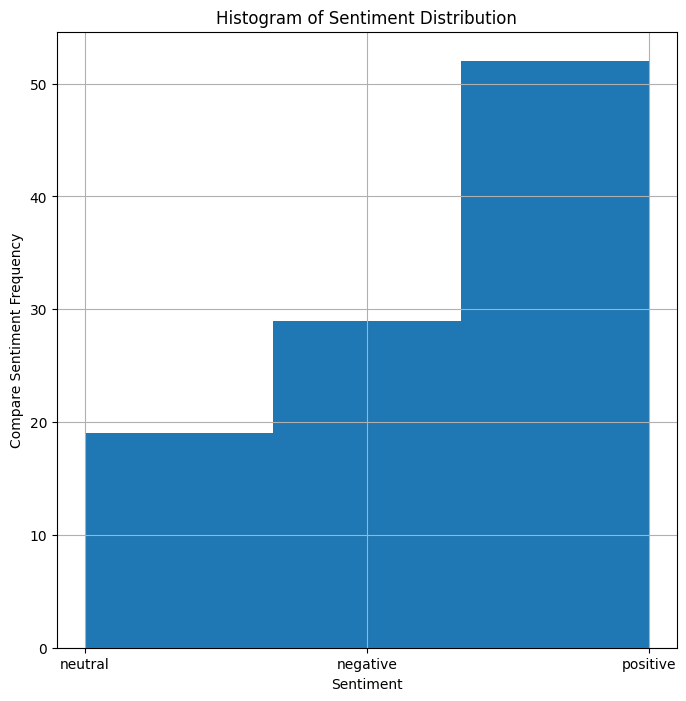

In [171]:
histogram_df = sentiment_df.copy()
plt.figure(figsize=(8, 8))
histogram_df.sentiment.hist(bins=3)
plt.gca()
plt.title('Histogram of Sentiment Distribution')
plt.xlabel('Sentiment', fontsize=10)
plt.ylabel('Compare Sentiment Frequency', fontsize=10)
plt.show()

# **Ερώτημα 2**

In [172]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn import svm
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
import gensim
from gensim.models import Word2Vec

from sklearn.metrics import classification_report, accuracy_score

## **Create train.tsv and test.tsv with data from 2023**

In [173]:
# split the data from the previous question to two dataframes (train_df and test_df)
new_df = sentiment_df.copy()
X = new_df.comments
y = new_df.sentiment

# train_df, test_df = train_test_split(new_df, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create train_df
train_df = pd.DataFrame(X_train)
train_df = train_df.reset_index(drop=True)
train_df['sentiment'] = y_train.reset_index(drop=True)

# create test_df
test_df = pd.DataFrame(X_test)
test_df = test_df.reset_index(drop=True)
test_df['sentiment'] = y_test.reset_index(drop=True)

# create train.tsv
train_df.to_csv('train.tsv', sep='\t', index=False)

# create test.tsv
test_df.to_csv('test.tsv', sep='\t', index=False)

## **TF-IDF**

In [174]:
# TF-IDF vectorization
tfidf_vector = TfidfVectorizer(max_features=1000)
comments_train = tfidf_vector.fit_transform(X_train)
comments_test = tfidf_vector.transform(X_test)

# save .pkl files
with open('comments_train.pkl', 'wb') as file:
  pickle.dump(comments_train, file)

with open('comments_test.pkl', 'wb') as file:
  pickle.dump(comments_test, file)

In [175]:
# load the data from the .pkl files
with open('comments_train.pkl', 'rb') as file:
  comments_train = pickle.load(file)

with open('comments_test.pkl', 'rb') as file:
  comments_test = pickle.load(file)

In [176]:
# use SVM classifier:

# we train our model
clf = svm.SVC()
clf.fit(comments_train, y_train)

# we predict from our model
predict_results = clf.predict(comments_test)

# cross validation
model = svm.SVC()
cv_scores = cross_val_score(model, comments_train, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

# Εκπαίδευση του μοντέλου στο πλήρες εκπαιδευτικό σύνολο
model.fit(comments_train, y_train)

# Τελική αξιολόγηση στο σύνολο ελέγχου
test_score = model.score(comments_test, y_test)
print("final results:", test_score)
print("Classification Report:\n", classification_report(y_test, predict_results))

results cross validation: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
mean: 0.5
final results: 0.6
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.00      0.00      0.00         4
    positive       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.20      0.33      0.25        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
# use Random Forests classifier:

# we train our model
clf = ensemble.RandomForestClassifier()
clf.fit(comments_train, y_train)

# we predict from our model
predict_results = clf.predict(comments_test)

# cross validation
model = clf
cv_scores = cross_val_score(model, comments_train, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

# Εκπαίδευση του μοντέλου στο πλήρες εκπαιδευτικό σύνολο
model.fit(comments_train, y_train)

# Τελική αξιολόγηση στο σύνολο ελέγχου
test_score = model.score(comments_test, y_test)
print("final results:", test_score)
print("Classification Report:\n", classification_report(y_test, predict_results))

results cross validation: [0.375 0.625 0.625 0.625 0.5   0.75  0.75  0.5   0.625 0.5  ]
mean: 0.5875
final results: 0.6
Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.50      0.57         4
     neutral       1.00      0.50      0.67         4
    positive       0.80      1.00      0.89        12

    accuracy                           0.80        20
   macro avg       0.82      0.67      0.71        20
weighted avg       0.81      0.80      0.78        20



In [178]:
# use KNN classifier:

# we train our model
knn = KNeighborsClassifier(20)
knn.fit(comments_train, y_train)

# we predict from our model
predict_results = knn.predict(comments_test)

# cross validation
model = knn
cv_scores = cross_val_score(model, comments_train, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

# Εκπαίδευση του μοντέλου στο πλήρες εκπαιδευτικό σύνολο
model.fit(comments_train, y_train)

# Τελική αξιολόγηση στο σύνολο ελέγχου
test_score = model.score(comments_test, y_test)
print("final results:", test_score)
print("Classification Report:\n", classification_report(y_test, predict_results))

results cross validation: [0.5   0.75  0.5   0.625 0.5   0.5   0.5   0.625 0.5   0.625]
mean: 0.5625
final results: 0.7
Classification Report:
               precision    recall  f1-score   support

    negative       0.50      0.50      0.50         4
     neutral       0.00      0.00      0.00         4
    positive       0.75      1.00      0.86        12

    accuracy                           0.70        20
   macro avg       0.42      0.50      0.45        20
weighted avg       0.55      0.70      0.61        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Word embeddings**

In [179]:
# Word embeddings vectorization
sentences = []
for row in X_train:
  sentences.append(row.split(' '))

model_w2v = Word2Vec(
            sentences,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(sentences, total_examples = len(X_train), epochs=20)

(46273, 75300)

In [180]:
# vectorization of the comments from train dataframe
lists_of_words = []
for row in X_train:
  lists_of_words.append(row.split(' '))

comments_train = []
for word_tokens in lists_of_words:
  comments_train.append(model_w2v.wv.get_mean_vector(word_tokens))

# vectorization of the comments from test dataframe
lists_of_words = []
for row in X_test:
  lists_of_words.append(row.split(' '))

comments_test = []
for word_tokens in lists_of_words:
  comments_test.append(model_w2v.wv.get_mean_vector(word_tokens))

# save .pkl files
with open('comments_train.pkl', 'wb') as file:
  pickle.dump(comments_train, file)

with open('comments_test.pkl', 'wb') as file:
  pickle.dump(comments_test, file)

In [181]:
# load the data from the .pkl files
with open('comments_train.pkl', 'rb') as file:
  comments_train = pickle.load(file)

with open('comments_test.pkl', 'rb') as file:
  comments_test = pickle.load(file)

In [182]:
# use SVM classifier:

# we train our model
clf = svm.SVC()
clf.fit(comments_train, y_train)

# we predict from our model
predict_results = clf.predict(comments_test)

# cross validation
model = clf
cv_scores = cross_val_score(model, comments_train, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

# Εκπαίδευση του μοντέλου στο πλήρες εκπαιδευτικό σύνολο
model.fit(comments_train, y_train)

# Τελική αξιολόγηση στο σύνολο ελέγχου
test_score = model.score(comments_test, y_test)
print("final results:", test_score)
print("Classification Report:\n", classification_report(y_test, predict_results))

results cross validation: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
mean: 0.5
final results: 0.6
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.00      0.00      0.00         4
    positive       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.20      0.33      0.25        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
# use Random Forests classifier:

# we train our model
clf = ensemble.RandomForestClassifier()
clf.fit(comments_train, y_train)

# we predict from our model
predict_results = clf.predict(comments_test)

# cross validation
model = clf
cv_scores = cross_val_score(model, comments_train, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

# Εκπαίδευση του μοντέλου στο πλήρες εκπαιδευτικό σύνολο
model.fit(comments_train, y_train)

# Τελική αξιολόγηση στο σύνολο ελέγχου
test_score = model.score(comments_test, y_test)
print("final results:", test_score)
print("Classification Report:\n", classification_report(y_test, predict_results))

results cross validation: [0.625 0.875 0.875 0.625 0.5   0.25  0.5   0.625 0.5   0.375]
mean: 0.575
final results: 0.65
Classification Report:
               precision    recall  f1-score   support

    negative       0.57      1.00      0.73         4
     neutral       0.00      0.00      0.00         4
    positive       0.85      0.92      0.88        12

    accuracy                           0.75        20
   macro avg       0.47      0.64      0.54        20
weighted avg       0.62      0.75      0.67        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
# use KNN classifier:

# we train our model
knn = KNeighborsClassifier(20)
knn.fit(comments_train, y_train)

# we predict from our model
predict_results = knn.predict(comments_test)

# cross validation
model = knn
cv_scores = cross_val_score(model, comments_train, y_train, cv=10)
print("results cross validation:", cv_scores)
print("mean:", cv_scores.mean())

# Εκπαίδευση του μοντέλου στο πλήρες εκπαιδευτικό σύνολο
model.fit(comments_train, y_train)

# Τελική αξιολόγηση στο σύνολο ελέγχου
test_score = model.score(comments_test, y_test)
print("final results:", test_score)
print("Classification Report:\n", classification_report(y_test, predict_results))

results cross validation: [0.625 0.75  0.75  0.625 0.625 0.25  0.5   0.5   0.5   0.25 ]
mean: 0.5375
final results: 0.75
Classification Report:
               precision    recall  f1-score   support

    negative       0.60      0.75      0.67         4
     neutral       0.00      0.00      0.00         4
    positive       0.80      1.00      0.89        12

    accuracy                           0.75        20
   macro avg       0.47      0.58      0.52        20
weighted avg       0.60      0.75      0.67        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Ερώτημα 3**

## **Create the dict of the most common words**

In [185]:
from collections import Counter

In [186]:
erotima3_df = X_train.copy()
big_string = ' '.join(erotima3_df)
individual_words = big_string.split()
word_frequency = Counter(individual_words)
most_common = word_frequency.most_common(500)
most_common_dict = {}
for i in most_common:
  most_common_dict[i[0]] = i[1]
most_common_dict

{'apartment': 58,
 'place': 39,
 'us': 36,
 'stay': 32,
 'location': 31,
 'good': 29,
 'nice': 28,
 'great': 27,
 'noisy': 26,
 'host': 26,
 'clean': 24,
 'athens': 23,
 'room': 22,
 'really': 22,
 'well': 21,
 'also': 21,
 'time': 21,
 'bathroom': 19,
 'flat': 19,
 'bed': 18,
 'bad': 18,
 'would': 18,
 'like': 18,
 'bit': 17,
 'broken': 16,
 'shower': 16,
 'even': 16,
 'could': 16,
 'dirty': 16,
 'recommend': 16,
 'one': 15,
 'area': 15,
 'water': 15,
 'comfortable': 14,
 'airbnb': 14,
 'get': 13,
 'kitchen': 12,
 'walk': 12,
 'close': 12,
 'located': 12,
 'two': 12,
 'neighborhood': 12,
 'quite': 11,
 'night': 11,
 'big': 10,
 'people': 10,
 'communication': 10,
 'windows': 10,
 'however': 10,
 'minutes': 10,
 'old': 10,
 'door': 10,
 'toilet': 10,
 'days': 9,
 'wifi': 9,
 'noise': 9,
 'acropolis': 9,
 'hosts': 9,
 'felt': 9,
 'floor': 9,
 'terrible': 9,
 'check': 9,
 'long': 9,
 'sleep': 8,
 'take': 8,
 'general': 8,
 'machine': 8,
 'min': 8,
 'helpful': 8,
 'restaurants': 8,
 'smal

## **Create a NxN dataframe for the cosine similarity between every word of the most common words**

In [187]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [188]:
# create a dict with the words and their vectors
word_vectors = {}
for word in most_common_dict:
  if word in model_w2v.wv:
    word_vector = model_w2v.wv[word]
    word_vectors[word] = word_vector

In [189]:
# create the dataframe
words_list = list(word_vectors.keys())
similarity_df = pd.DataFrame(index=words_list, columns=words_list)
similarity_df

# fill the dataframe
for word1 in word_vectors:
  for word2 in word_vectors:
    vector1 = word_vectors[word1].reshape(1, -1)
    vector2 = word_vectors[word2].reshape(1, -1)
    similarity = cosine_similarity(vector1, vector2)[0][0]
    similarity_df.loc[word1, word2] = similarity

similarity_df

,apartment,place,us,stay,location,good,nice,great,noisy,host,...,mostly,three,bedrooms,common,attention,buildings,trash,choice,sure,furnished
apartment,1.0,0.990096,0.98181,0.986771,0.990725,0.991387,0.992293,0.98987,0.993239,0.987768,...,0.994019,0.993389,0.995974,0.994387,0.995251,0.991238,0.991452,0.993191,0.992505,0.991431
place,0.990096,1.0,0.982351,0.989539,0.990109,0.988465,0.991314,0.99192,0.989294,0.98696,...,0.994871,0.992354,0.994476,0.994973,0.992207,0.993418,0.994063,0.99371,0.993146,0.984577
us,0.98181,0.982351,1.0,0.983401,0.982093,0.983202,0.98449,0.984919,0.979068,0.98774,...,0.987555,0.985832,0.986658,0.988488,0.986852,0.990443,0.989448,0.990875,0.989352,0.984087
stay,0.986771,0.989539,0.983401,1.0,0.98745,0.988285,0.991233,0.991707,0.981955,0.991726,...,0.991903,0.992496,0.990174,0.992147,0.99182,0.993481,0.992311,0.994009,0.993787,0.980291
location,0.990725,0.990109,0.982093,0.98745,1.0,0.997141,0.996002,0.996195,0.98474,0.983212,...,0.992197,0.988536,0.990131,0.992378,0.988436,0.990464,0.988228,0.990904,0.989517,0.988656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
buildings,0.991238,0.993418,0.990443,0.993481,0.990464,0.991506,0.99281,0.993432,0.989285,0.993133,...,0.996788,0.996962,0.995488,0.996881,0.996124,1.0,0.998011,0.998233,0.997906,0.988157
trash,0.991452,0.994063,0.989448,0.992311,0.988228,0.989027,0.99077,0.990913,0.990438,0.992852,...,0.996962,0.996904,0.996018,0.996644,0.99633,0.998011,1.0,0.998217,0.997992,0.987314
choice,0.993191,0.99371,0.990875,0.994009,0.990904,0.991799,0.993251,0.993435,0.990457,0.994458,...,0.997417,0.997274,0.996553,0.997424,0.997232,0.998233,0.998217,1.0,0.998439,0.98897
sure,0.992505,0.993146,0.989352,0.993787,0.989517,0.990842,0.992256,0.991979,0.990976,0.994106,...,0.997503,0.997822,0.996549,0.997069,0.996986,0.997906,0.997992,0.998439,1.0,0.988491


In [190]:
# create a csv file for the cosine similarities of the most common words
similarity_df.to_csv('cosine_similarities.csv')

In [191]:
# read the cosine similarities
cosine_similarities_df = pd.read_csv('cosine_similarities.csv')
cosine_similarities_df.set_index('Unnamed: 0', inplace=True)
cosine_similarities_df.index.name = None
cosine_similarities_df

,apartment,place,us,stay,location,good,nice,great,noisy,host,...,mostly,three,bedrooms,common,attention,buildings,trash,choice,sure,furnished
apartment,1.000000,0.990096,0.981810,0.986771,0.990725,0.991387,0.992293,0.989870,0.993239,0.987768,...,0.994019,0.993389,0.995974,0.994387,0.995251,0.991238,0.991452,0.993191,0.992505,0.991431
place,0.990096,1.000000,0.982351,0.989539,0.990109,0.988465,0.991314,0.991919,0.989294,0.986960,...,0.994871,0.992354,0.994476,0.994973,0.992207,0.993418,0.994063,0.993710,0.993146,0.984577
us,0.981810,0.982351,1.000000,0.983401,0.982093,0.983202,0.984490,0.984919,0.979068,0.987740,...,0.987555,0.985832,0.986658,0.988488,0.986852,0.990443,0.989448,0.990875,0.989352,0.984087
stay,0.986771,0.989539,0.983401,1.000000,0.987450,0.988285,0.991233,0.991707,0.981955,0.991726,...,0.991903,0.992496,0.990174,0.992147,0.991820,0.993481,0.992311,0.994009,0.993787,0.980291
location,0.990725,0.990109,0.982093,0.987450,1.000000,0.997140,0.996002,0.996195,0.984740,0.983212,...,0.992197,0.988536,0.990131,0.992378,0.988436,0.990464,0.988228,0.990904,0.989517,0.988656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
buildings,0.991238,0.993418,0.990443,0.993481,0.990464,0.991506,0.992810,0.993432,0.989285,0.993133,...,0.996788,0.996962,0.995488,0.996881,0.996124,1.000000,0.998011,0.998233,0.997906,0.988157
trash,0.991452,0.994063,0.989448,0.992311,0.988228,0.989027,0.990770,0.990913,0.990438,0.992852,...,0.996962,0.996904,0.996018,0.996644,0.996330,0.998011,1.000000,0.998217,0.997992,0.987314
choice,0.993191,0.993710,0.990875,0.994009,0.990904,0.991799,0.993251,0.993435,0.990457,0.994458,...,0.997417,0.997274,0.996553,0.997424,0.997232,0.998233,0.998217,1.000000,0.998439,0.988970
sure,0.992505,0.993146,0.989352,0.993787,0.989517,0.990842,0.992256,0.991979,0.990976,0.994106,...,0.997503,0.997822,0.996549,0.997069,0.996986,0.997906,0.997992,0.998439,1.000000,0.988491


## **3.a**

In [192]:
# get the semantic neighborhood of a word and the word vector
# if a word exists in our model, return the calculated similarity
# else get a random vector with values in (-1,1) and find the similarities
# according to that vector
def semantic_neighborhood(word, N):
  if word not in model_w2v.wv:
    word_vector = np.random.uniform(-1, 1, 200) # get random vector
    similarities = {}  # find the N largest similarities
    vector1 = word_vector.reshape(1, -1)
    for word1 in word_vectors:
      vector2 = word_vectors[word1].reshape(1, -1)
      similarity = cosine_similarity(vector1, vector2)[0][0]
      if len(similarities) < N:
        similarities[word1] = similarity
      else:
        min_value_key = min(similarities, key=similarities.get)
        if similarities[min_value_key] < similarity:
          del similarities[min_value_key]
          similarities[word1] = similarity
    for key in similarities:
      similarities[key] = round(similarities[key], 8)
    return (similarities, word_vector)
  else:
    results = cosine_similarities_df['{}'.format(word)].nlargest(N + 1)
    results = results.drop(results.idxmax())
    similarities = results.to_dict()
    return (similarities, model_w2v.wv[word])

# return the semantic neighborhoods of two words and the word vectors
def get_semantic_neighborhoods(word1, word2, N):
  return (semantic_neighborhood(word1,N), semantic_neighborhood(word2,N))

# get max similarity from word to neigh
def max_similarity_word_to_word_neigh(word, word_vector, neigh):
  if word not in model_w2v.wv:
    vector1 = word_vector.reshape(1, -1)
    max_similarity = None
    for word_2 in neigh:
      vector2 = model_w2v.wv[word_2].reshape(1, -1)
      similarity = cosine_similarity(vector1, vector2)[0][0]
      if max_similarity == None: max_similarity = (word_2, similarity)
      elif max_similarity[1] < similarity: max_similarity = (word_2, similarity)
    return max_similarity
  else:
    max_similarity = None
    for word_2 in neigh:
      similarity = cosine_similarities_df.loc[word, word_2]
      if max_similarity == None: max_similarity = (word_2, similarity)
      elif max_similarity[1] < similarity: max_similarity = (word_2, similarity)
    return max_similarity

In [193]:
def get_3a_similarity(word1, word2, N):

  # get the word neighborhoods and word vectors
  sem_neigh = get_semantic_neighborhoods(word1, word2, N)
  sem_neigh_word1 = sem_neigh[0][0] # get the word neighborhoods
  sem_neigh_word2 = sem_neigh[1][0]
  word1_vector = sem_neigh[0][1]  # get the word vectors
  word2_vector = sem_neigh[1][1]

  # get the max similarity between two words
  results1 = max_similarity_word_to_word_neigh(word1, word1_vector, sem_neigh_word2)
  results2 = max_similarity_word_to_word_neigh(word2, word2_vector, sem_neigh_word1)
  total_max = max(results1[1], results2[1])
  print("maximum similarity of neighborhoods:", total_max)
  return (total_max, sem_neigh)

## **3.b**

In [194]:
# get all the similarities from word to neigh
def similarities_word_to_word_neigh(word, word_vector, neigh):
  if word not in model_w2v.wv:
    vector1 = word_vector.reshape(1, -1)
    similarities = {}
    for word_2 in neigh:
      vector2 = model_w2v.wv[word_2].reshape(1, -1)
      similarity = cosine_similarity(vector1, vector2)[0][0]
      similarities[word_2] = similarity
    return similarities
  else:
    similarities = {}
    for word_2 in neigh:
      similarity = cosine_similarities_df.loc[word, word_2]
      similarities[word_2] = similarity
    return similarities

# find the correlation of neighborhood similarities
def neigh_sim_correlation(C1_N1_values, C2_N1_values, C1_N2_values, C2_N2_values):
  x_simple = np.array(C1_N1_values)
  y_simple = np.array(C2_N1_values)
  my_rho = np.corrcoef(x_simple, y_simple)
  b12 = my_rho[0, 1]

  x_simple = np.array(C1_N2_values)
  y_simple = np.array(C2_N2_values)
  my_rho = np.corrcoef(x_simple, y_simple)
  b21 = my_rho[0, 1]

  R = max(b12, b21)
  return R

In [195]:
# Ci -> wordi
# Nj -> neigh of wordj
# Ci_Nj -> similarities of wordi to the neigh of wordj

def get_3b_similarity(word1, word2, sem_neigh):

  # get the word neighborhoods and word vectors
  sem_neigh_word1 = sem_neigh[0][0] # get the word neighborhoods
  sem_neigh_word2 = sem_neigh[1][0]
  word1_vector = sem_neigh[0][1]  # get the word vectors
  word2_vector = sem_neigh[1][1]

  # set the similarities
  C1_N1 = sem_neigh_word1
  C1_N1_values = list(C1_N1.values()) # similarities of word1 to the neigh of word1

  C1_N2 = similarities_word_to_word_neigh(word1, word1_vector, sem_neigh_word2)
  C1_N2_values = list(C1_N2.values()) # similarities of word1 to the neigh of word2

  C2_N1 = similarities_word_to_word_neigh(word2, word2_vector, sem_neigh_word1)
  C2_N1_values = list(C2_N1.values()) # similarities of word2 to the neigh of word1

  C2_N2 = sem_neigh_word2
  C2_N2_values = list(C2_N2.values()) # similarities of word2 to the neigh of word2

  # find the correlation of neighborhood similarities
  R = neigh_sim_correlation(C1_N1_values, C2_N1_values, C1_N2_values, C2_N2_values)
  print("correlation of neighborhood similarities:", R)

## **3.c**

In [196]:
# get similarity from word to neigh
def sum_of_squared_similarities(word, word_vector, neigh):
  sum = 0
  if word not in model_w2v.wv:
    vector1 = word_vector.reshape(1, -1)
    for word_2 in neigh:
      vector2 = model_w2v.wv[word_2].reshape(1, -1)
      similarity = cosine_similarity(vector1, vector2)[0][0]
      sum += (similarity ** 2)
  else:
    max_similarity = None
    for word_2 in neigh:
      similarity = cosine_similarities_df.loc[word, word_2]
      sum += (similarity ** 2)
  return sum

In [197]:
def get_3c_similarity(word1, word2, sem_neigh):

  # get the word neighborhoods and word vectors
  sem_neigh_word1 = sem_neigh[0][0] # get the word neighborhoods
  sem_neigh_word2 = sem_neigh[1][0]
  word1_vector = sem_neigh[0][1]  # get the word vectors
  word2_vector = sem_neigh[1][1]

  results1 = sum_of_squared_similarities(word1, word1_vector, sem_neigh_word2)
  results2 = sum_of_squared_similarities(word2, word2_vector, sem_neigh_word1)
  total_result = (results1 + results2) ** 0.5
  print("sum of squared neighborhood similarities:", total_result)

## **Calculate 3.a/3.b/3.c**

In [200]:
# get all the similarities
def get_all_the_similarities(word1, word2, N):
  print("3.a:")
  results = get_3a_similarity(word1, word2, N)
  sem_neigh = results[1]

  print("\n3.b:")
  get_3b_similarity(word1, word2, sem_neigh)

  print("\n3.c:")
  get_3c_similarity(word1, word2, sem_neigh)

# set the two words and the N parameter
N = 5
word1 = 'place'
word2 = 'apartment'
get_all_the_similarities(word1, word2, N)

3.a:
maximum similarity of neighborhoods: 0.99447596

3.b:
correlation of neighborhood similarities: 0.6657141348635911

3.c:
sum of squared neighborhood similarities: 3.1389534371052172
